1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + `features_1`
  + `features_2`
  + `features_3`
  
Are these features correlated? Please add a comment.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import pickle    
from scipy.stats import norm
from scipy.integrate import trapz
import seaborn as sns

In [ ]:
#!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv -P ./data/

correlation between features_1 and features_2 is: -0.005219711383220024
correlation between features_1 and features_3 is: 0.02369042507320446
correlation between features_2 and features_3 is: 0.047359939435040806


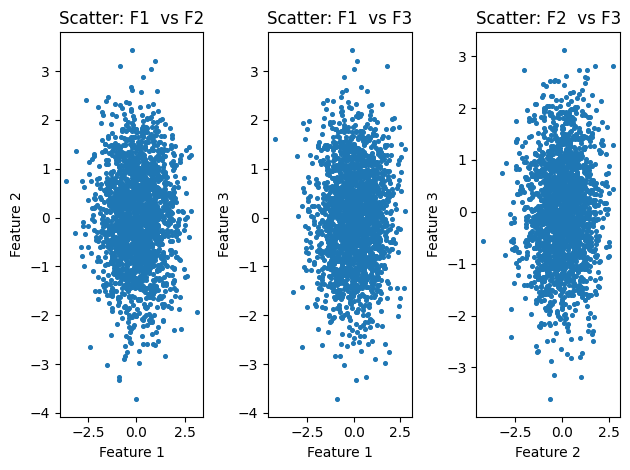

In [2]:
file_name= "./data/regression_generated.csv"
data = pd.read_csv(file_name)

f1 = data['features_1']
f2 = data['features_2']
f3 = data['features_3']

cr_F1_F2 = data['features_1'].corr(data['features_2'])
cr_F1_F3 = data['features_1'].corr(data['features_3'])
cr_F2_F3 = data['features_2'].corr(data['features_3'])

print("correlation between features_1 and features_2 is:",cr_F1_F2)
print("correlation between features_1 and features_3 is:",cr_F1_F3)
print("correlation between features_2 and features_3 is:",cr_F2_F3)

# From the correlation coefficients, we can see that the most correlated are. However, there is no significant correlation between any of the features.

size_plots = 7

fig, axes = plt.subplots(1,3) 
ax = axes[0]
ax.scatter(f2,f1,s=size_plots)
ax.set_title('Scatter: F1  vs F2')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax = axes[1]
ax.scatter(f3,f1,s=size_plots)
ax.set_title('Scatter: F1  vs F3')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 3')
ax = axes[2]
ax.scatter(f3,f2,s=size_plots)
ax.set_title('Scatter: F2  vs F3')
ax.set_xlabel('Feature 2')
ax.set_ylabel('Feature 3')
plt.tight_layout()
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

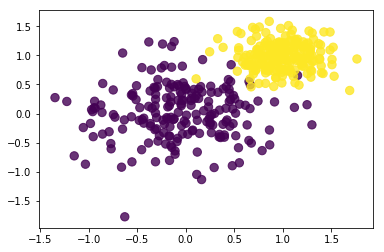

In [1]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

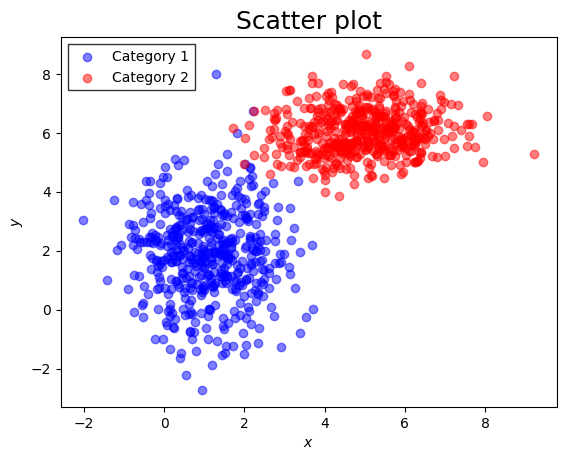

In [4]:
def f(mn1,sd1,mn2,sd2,N):
    data1 = np.random.normal(mn1,sd1,size = (N,2))
    data2 = np.random.normal(mn2,sd2,size = (N,2))

    dataset = np.concatenate((data1, data2),axis = 0)
    return dataset

def plotting(dataset,N):
    plt.scatter(dataset[0:N, 0], dataset[0:N, 1], c='blue', label='Category 1',alpha=0.5)
    plt.scatter(dataset[N:, 0], dataset[N:, 1], c='red', label='Category 2',alpha=0.5)

    # Add labels and legend
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.legend(loc = "upper left",fancybox = False, edgecolor = "black")
    plt.title("Scatter plot",fontsize=18)
    
    # Show the plot
    plt.show()

# Example usage
N = 500
Mean_1 = [1, 2]
Stand_Dev_1 = [1, 1.5]
Mean_2 = [5, 6]
Stand_Dev_2 = [1.2, 0.8]
data_2d = f(Mean_1, Stand_Dev_1, Mean_2, Stand_Dev_2,N)
plotting(data_2d,N)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [ ]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

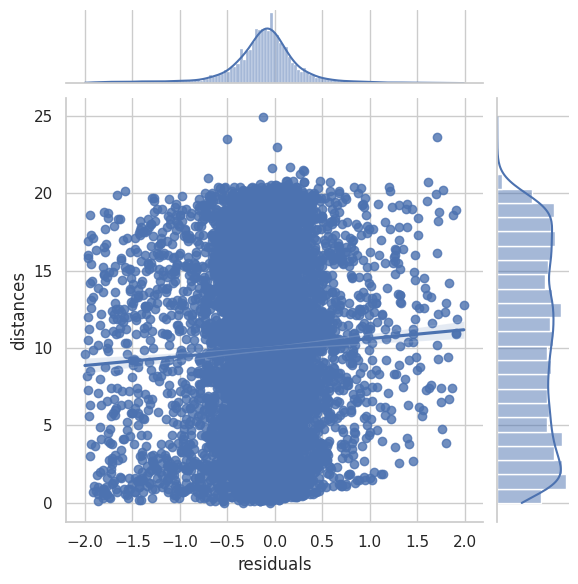

In [5]:
with open("data/residuals_261.pkl","rb") as file:
    dict_pickled = pickle.load(file)
    dict_unpickled = dict_pickled[()]
    df = pd.DataFrame.from_dict(dict_unpickled)

df_cleaned = df[abs(df['residuals']) < 2]
sns.set(style="whitegrid")
sns.jointplot(x='residuals', y='distances', data=df_cleaned, kind='reg')


Correlation between 'residuals' and 'distances': 0.04


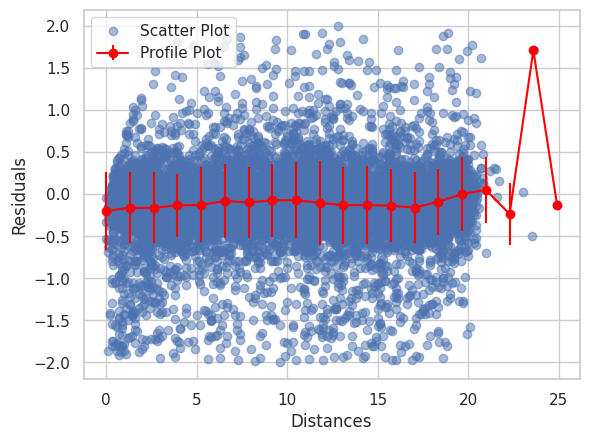

In [6]:
correlation = df_cleaned['residuals'].corr(df_cleaned['distances'])
print(f"Correlation between 'residuals' and 'distances': {correlation:.2f}")
bin_centers = np.linspace(df_cleaned['distances'].min(), df_cleaned['distances'].max(), 20)
digitized = np.digitize(df_cleaned['distances'], bin_centers)
bin_means = [df_cleaned['residuals'][digitized == i].mean() for i in range(1, len(bin_centers) + 1)]
bin_std = [df_cleaned['residuals'][digitized == i].std() for i in range(1, len(bin_centers) + 1)]

# Convert to numpy arrays
x = np.array(bin_centers)
y = np.array(bin_means)
err_y = np.array(bin_std)
# Scatter plot
plt.scatter(df_cleaned['distances'], df_cleaned['residuals'], alpha=0.5, label='Scatter Plot')

# Profile plot
plt.errorbar(x, y, yerr=err_y, fmt='o-', color='red', label='Profile Plot')

# Add labels and legend
plt.xlabel('Distances')
plt.ylabel('Residuals')
plt.legend()

# Show the plot
plt.show()

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


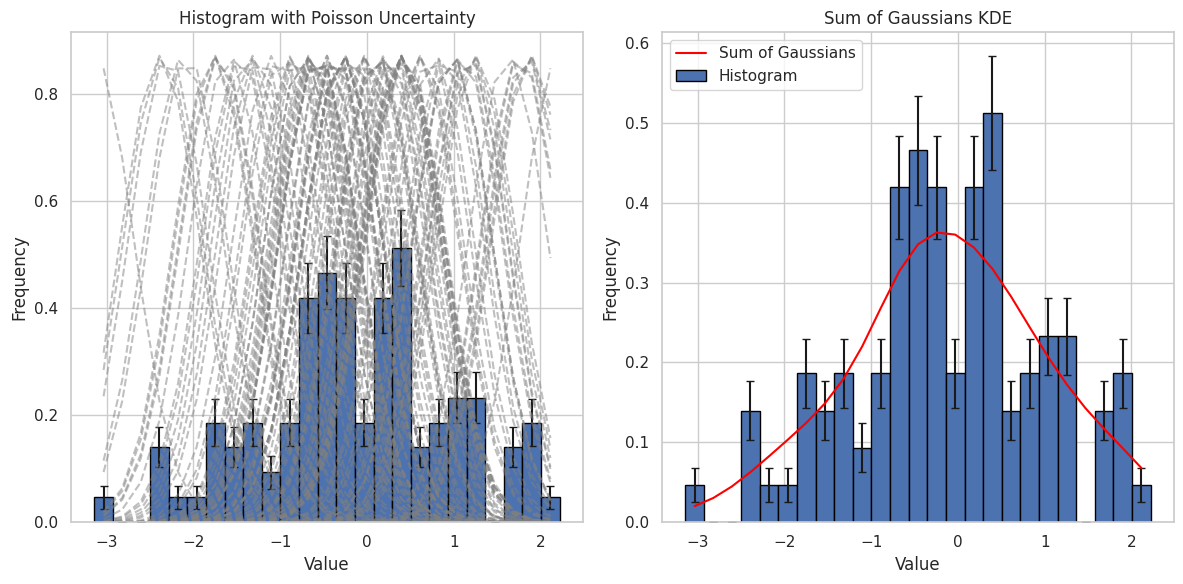

In [7]:

np.random.seed(42)

# Parameters
N = 100
mean = 0
std_dev = 1.2
b = 25

x = np.random.normal(loc=mean, scale=std_dev, size=N)

hist, bins = np.histogram(x, bins=b, density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2
bin_width = bins[1] - bins[0]
poisson_errors = np.sqrt(hist * N) / N

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(bin_centers, hist, width=bin_width, edgecolor='black', yerr=poisson_errors, capsize=3)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with Poisson Uncertainty')

std_dev_default = 1.06 * x.std() * N**(-1/5)

gaussian_functions = []

for val in x:
    gaussian = norm.pdf(bin_centers, loc=val, scale=std_dev_default)
    gaussian_functions.append(gaussian)
    plt.plot(bin_centers, gaussian, linestyle='--', alpha=0.5, color='gray')

sum_gaussian = np.sum(gaussian_functions, axis=0)
integral_sum_gaussian = trapz(sum_gaussian, bin_centers)
integral_hist = trapz(hist, bin_centers)
sum_gaussian /= (integral_sum_gaussian / integral_hist)

plt.subplot(1, 2, 2)
plt.bar(bin_centers, hist, width=bin_width, edgecolor='black', yerr=poisson_errors, capsize=3, label='Histogram')
plt.plot(bin_centers, sum_gaussian, linestyle='-', color='red', label='Sum of Gaussians')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Sum of Gaussians KDE')
plt.legend()

plt.tight_layout()
plt.show()